In [22]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

experiencia = pd.Series([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

salario = pd.Series([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])

salario

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
dtype: float64

In [23]:
#Creamos el dataframe
df = pd.DataFrame({'Experiencia': experiencia, 'Salario': salario})
df

,Experiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
salario.isnull().sum()
experiencia.isnull().sum()

0

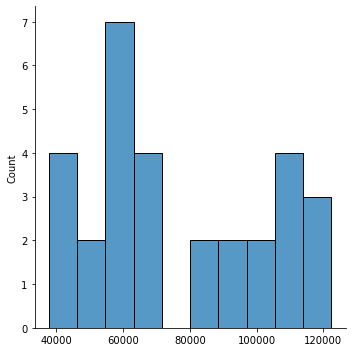

In [5]:
sns.displot(salario, bins=10)
plt.show()

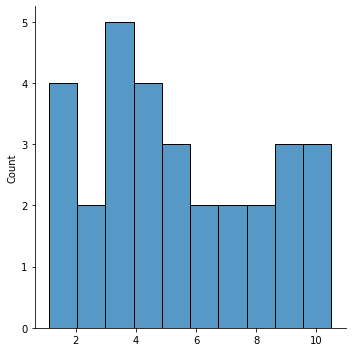

In [6]:
sns.displot(experiencia, bins=10)
plt.show()

<AxesSubplot:>

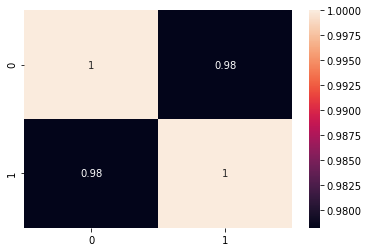

In [9]:
#Creamos matriz de correlacion de pearson(si esta cerca de 1 o -1 es buena)
correlacion_matrix_salary = np.corrcoef(salario, experiencia)
sns.heatmap(data=correlacion_matrix_salary, annot=True)

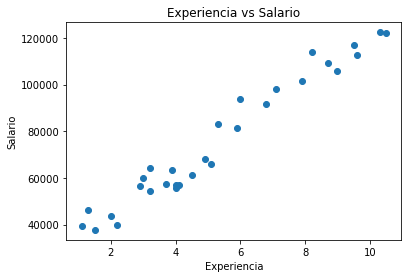

In [11]:
plt.scatter(experiencia, salario)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [14]:
print('Maximo valor {}'.format(salario.max()))
print('Minimo valor {}'.format(salario.min()))
print('Mean valor {}'.format(salario.mean()))
print('Median valor {}'.format(salario.median()))
print('STD valor {}'.format(salario.std()))

Maximo valor 122391.0
Minimo valor 37731.0
Mean valor 76003.0
Median valor 65237.0
STD valor 27414.4297845823


In [27]:
#Una vez analizados los datos tenemos que dividir nuestro datos en Training y Test(Generalmente es un 20% de los datos para test y el resto para training)

X_experiencia = experiencia
y_salario = salario 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_experiencia, y_salario, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(24,)
(6,)
(24,)
(6,)


In [30]:
#Generamos nuestro modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#X_train = X_train.values.reshape(-1,1) hay que pasar la variable a 2 dimensiones pq la funcion esta hecha para regresion multiple

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)




LinearRegression()

In [35]:
#Evaluamos el modelo
from sklearn.metrics import r2_score
#X_test = X_test.values.reshape(-1,1)
y_test_predict = lin_model.predict(X_test)
r2 = r2_score(y_test, y_test_predict)
print('R2 score is {} '.format(r2))

R2 score is 0.9024461774180497 


In [36]:
print('Coeficiente: \n', lin_model.coef_)
print('Independent term: \n', lin_model.intercept_)

Coeficiente: 
 [9423.81532303]
Independent term: 
 25321.583011776813


In [40]:
#experiencia = experiencia.values.reshape(-1,1)
predicted_data_salario = lin_model.predict(experiencia)

predicted_data_salario[0:5]

array([35687.77986711, 37572.54293172, 39457.30599632, 44169.21365784,
       46053.97672244])

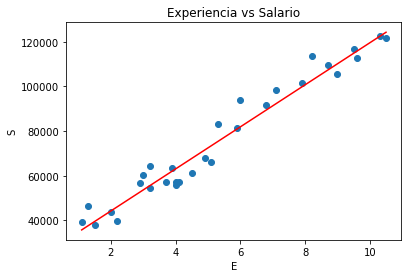

In [45]:
plt.scatter(experiencia, salario)
plt.plot(experiencia, predicted_data_salario, color='red')
plt.title('Experiencia vs Salario')
plt.xlabel('E')
plt.ylabel('S')
plt.show()

In [46]:
df1 = pd.DataFrame({'Real': salario, 'Prediccion': predicted_data_salario})
df1

,Real,Prediccion
0,39343.0,35687.779867
1,46205.0,37572.542932
2,37731.0,39457.305996
3,43525.0,44169.213658
4,39891.0,46053.976722
5,56642.0,52650.647449
6,60150.0,53593.028981
7,54445.0,55477.792045
8,64445.0,55477.792045
9,57189.0,60189.699707


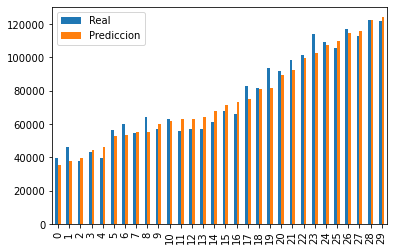

In [49]:
df1.head(30).plot(kind='bar')
plt.show()

In [51]:
import sklearn.datasets 
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [52]:
dsBoston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [53]:
dfBoston = pd.DataFrame(dsBoston.data, columns=dsBoston.feature_names)
dfBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
dfBoston.shape

(506, 13)

In [55]:
dsBoston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [56]:
#Agregamos la columna MEDV la cual tiene el precio medio de la vivienda
dfBoston['MEDV']=dsBoston.target
dfBoston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [57]:
#chequeamos que no hayan datos nulos
dfBoston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

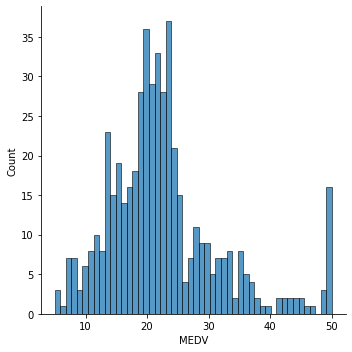

In [60]:
#con esta funcion vemos que la mayoria de los precios de las casas ronda los $20000
sns.displot(dfBoston['MEDV'],bins=50)
plt.show()

In [62]:
#Mostramos la matriz de correlacion de Pearson ya sabemos mientras mas cerca de 1 o -1 mejor
correlation_matrix_boston = dfBoston.corr().round(2)
correlation_matrix_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


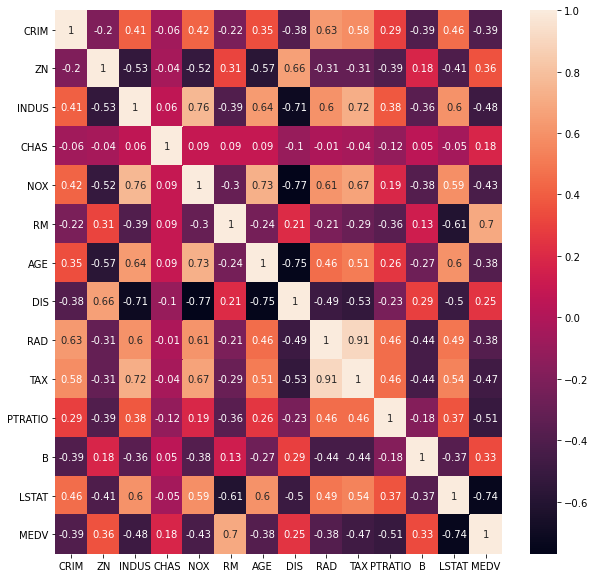

In [65]:
sns.heatmap(data=correlation_matrix_boston, annot=True)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

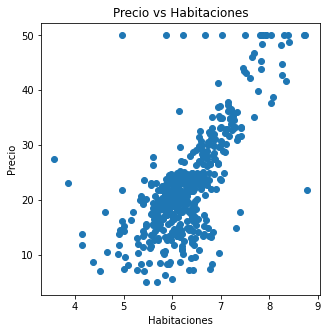

In [69]:
plt.scatter(dfBoston['RM'],dfBoston['MEDV'])
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.rcParams['figure.figsize']=(5,5)
plt.show()

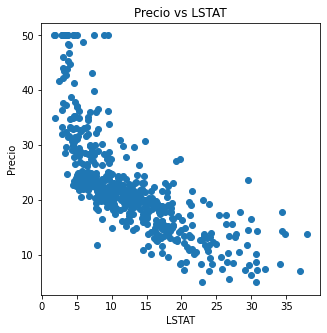

In [75]:
plt.scatter(dfBoston['LSTAT'],dfBoston['MEDV'])
plt.title('Precio vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('Precio')
plt.rcParams['figure.figsize']=(5,5)
plt.show()

In [74]:
print('Maximo valor {}'.format(dfBoston['MEDV'].max()))
print('Minimo valor {}'.format(dfBoston['MEDV'].min()))
print('Mean {}'.format(dfBoston['MEDV'].mean()))
print('Median {}'.format(dfBoston['MEDV'].median()))
print('Std {}'.format(dfBoston['MEDV'].std()))

Maximo valor 50.0
Minimo valor 5.0
Mean 22.532806324110698
Median 21.2
Std 9.19710408737982


In [76]:
X_featureRM = dfBoston['RM']
y_priceMEDV = dfBoston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_featureRM, y_priceMEDV, test_size= 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404,)
(102,)
(404,)
(102,)


In [79]:
#X_train = X_train.values.reshape(-1,1)
lin_model_boston = LinearRegression()
lin_model_boston.fit(X_train, y_train)

print('Coeficiente \n', lin_model_boston.coef_)
print('Independiente \n', lin_model_boston.intercept_)

Coeficiente 
 [9.34830141]
Independiente 
 -36.24631889813795


In [80]:
y_train_predict = lin_model_boston.predict(X_train)
r2 = r2_score(y_train, y_train_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.5050658352776293


In [91]:
#X_test = X_test.values.reshape(-1,1)
y_test_predict = lin_model_boston.predict(X_test)
r2 = r2_score(y_test, y_test_predict)
print('R2 score is {}'.format(r2))

R2 score is 0.3707569232254778


In [92]:
predicted_data_boston = lin_model_boston.predict(dfBoston[['RM']])
predicted_data_boston[0:5]

array([25.21876285, 23.77912443, 30.92122671, 29.17309434, 30.56599125])

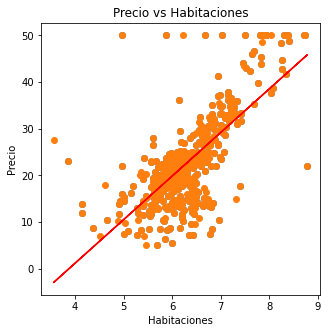

In [95]:
#X_train, X_test, y_train, y_test
plt.scatter(X_train, y_train)
plt.scatter(dfBoston['RM'],dfBoston['MEDV'])
plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.rcParams['figure.figsize']=(5,5)
plt.show()

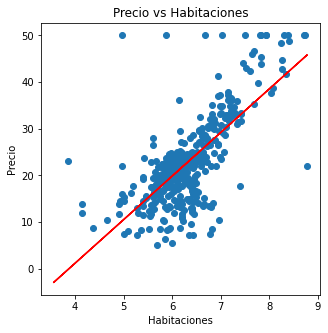

In [96]:
#X_train, X_test, y_train, y_test
plt.scatter(X_train, y_train)

plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.rcParams['figure.figsize']=(5,5)
plt.show()

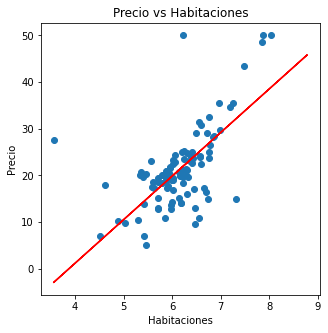

In [97]:
#X_train, X_test, y_train, y_test
plt.scatter(X_test, y_test)

plt.plot(dfBoston['RM'], predicted_data_boston, color='red')
plt.title('Precio vs Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.rcParams['figure.figsize']=(5,5)
plt.show()

In [99]:
dfAP = pd.DataFrame({'Actual':dfBoston['MEDV'], 'Prediccion':predicted_data_boston})
dfAP

,Actual,Prediccion
0,24.0,25.218763
1,21.6,23.779124
2,34.7,30.921227
3,33.4,29.173094
4,36.2,30.565991
...,...,...
501,22.4,25.387032
502,20.6,20.965286
503,23.9,28.967432
504,22.0,27.266041


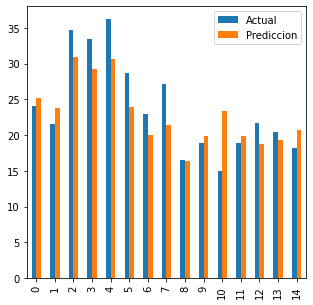

In [100]:
dfAP.head(15).plot(kind='bar')
plt.show()